In [2]:
# Python
import numpy as np
import pandas as pd
from prophet import Prophet
from scipy import stats
from prophet.plot import plot_yearly

Importing plotly failed. Interactive plots will not work.


In [3]:
try:
    df = pd.read_csv('/Users/chris/Documents/UR/SENIOR/FinalSemester/CSC260/Final_Project/pmn_data.csv')
except:
    print("well that didn't work...")

In [66]:
Location_1 = 'TX - Drum Bay'
Location_2 = 'TX — TX - Port O\'Connor Fishing Pier'
Location_3 = 'TX - Jims Pier'
Location_4 = 'TX - Bastrop Bay'
Location_5 = 'Windsurfing Flats Bay Access 2,26.14342'
Location_6 = 'Christmas Bay'
Location_7 = 'Seaside Circle Beach Access 6,26.10269'

# We are specifically looking at Diatoms per: https://accscatalog.uaa.alaska.edu/sites/default/files/Phytoplankton%20Guide_May_11_2015_sm.pdf
# Chaetoceros spp. is a specific plankton for it's impacts on fish populations — we would perhaps reccomend not overfishing during periods of bloom
Plankton = ['Coscinodiscus morphotype','Pseudo-nitzschia spp.','Odontella spp.','Bacteriastrum spp.','Chaetoceros spp.']
LocationList = [Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7]
print(df['spec_name'].mode()) # Coscinodiscus morphotype is the modal phytoplankton with 1482 samples
frames = []
prophetList = []
concatenated = []
all =[]
for p in Plankton:  
    frames = []
    for loc in LocationList:
        frame = df.loc[(df['sampl_site'] == loc) &  (df['spec_name'] == p)]
        frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
        frames.append(frame)
        all.append(frame)
    Texas = pd.concat(frames)
    concatenated.append(Texas)
All = pd.concat(all)




0    Coscinodiscus morphotype
Name: spec_name, dtype: object


/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/2970624315.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/2970624315.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/2970624315.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/2970624315.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/2970624315.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame 

In [67]:
for c in concatenated:
    dataFrame = pd.DataFrame(c)
    p = Prophet()
    p.fit(dataFrame)
    prophetList.append(p)

14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
futures = []
for p in prophetList:
    future = p.make_future_dataframe(periods=365)
    future.tail()
    futures.append(future)

In [43]:
forecasts = []
for i in range(len(prophetList)):
    forecast = prophetList[i].predict(futures[i])
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    forecasts.append(forecast)

In [ ]:
for i in range(len(prophetList)):
    fig1 = prophetList[i].plot_components(forecasts[i])

    

In [ ]:
for c in concatenated:
    dataFrame = pd.DataFrame(c)
    p = Prophet().fit(dataFrame)
    a = plot_yearly(p)

14:20:06 - cmdstanpy - INFO - Chain [1] start processing
14:20:06 - cmdstanpy - INFO - Chain [1] done processing


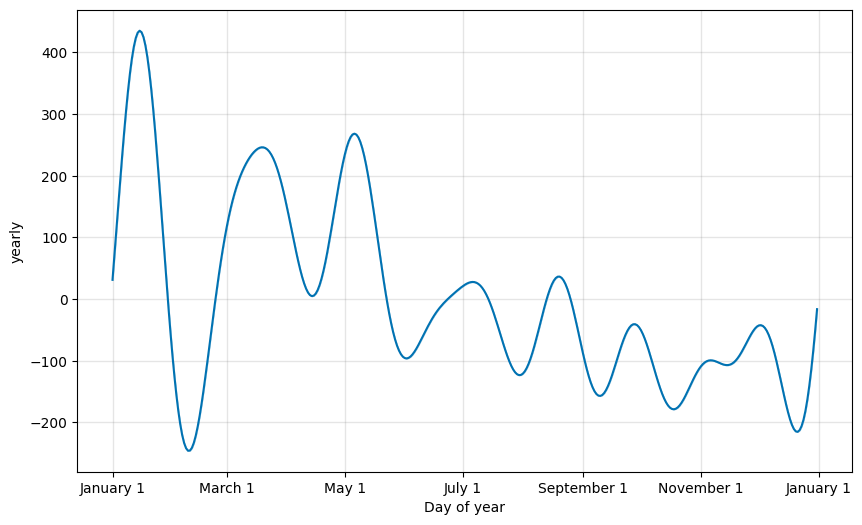

In [68]:
dataFrame = pd.DataFrame(All)
p = Prophet()
p.fit(All)
a = plot_yearly(p)